In [23]:
from functools import total_ordering
import calendar
import zipfile
import os
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from datetime import datetime

In [136]:
df = pd.read_csv('MSFT.csv', sep=",", index_col=False).filter(['UnderlyingPrice', 'Type', 'Expiration',
                   'DataDate', 'Strike', 'Last', 'Bid', 'Ask', 'Volume', 'OpenInterest', 'IV', 'Delta', 'Gamma',
                   'Theta', 'Vega'])

In [138]:
print(df.head())

   index  UnderlyingPrice  Type  Expiration    DataDate  Strike   Last   Bid  \
0      0             59.8  call  11/04/2016  11/01/2016    49.5  10.40  9.65   
1      1             59.8   put  11/04/2016  11/01/2016    49.5   0.01  0.00   
2      2             59.8  call  11/04/2016  11/01/2016    50.0   0.00  9.20   
3      3             59.8   put  11/04/2016  11/01/2016    50.0   0.09  0.00   
4      4             59.8  call  11/04/2016  11/01/2016    50.5   7.50  8.65   

     Ask  Volume  OpenInterest      IV  Delta  Gamma   Theta  Vega  
0  10.65       0             2  0.2951    1.0    0.0 -0.4497   0.0  
1   0.01       0            36  0.3362    0.0    0.0  0.0000   0.0  
2  10.15       0             0  0.2951    1.0    0.0 -0.4542   0.0  
3   0.02       0            22  0.3362    0.0    0.0  0.0000   0.0  
4   9.70       0            32  0.2951    1.0    0.0 -0.4588   0.0  


In [139]:
df['Expiration'] = pd.to_datetime(df['Expiration'])
df['DataDate'] = pd.to_datetime(df['DataDate'])

In [140]:
df2 = df.drop_duplicates(subset='DataDate', keep='first').filter(['DataDate', 'UnderlyingPrice'])

In [141]:
df2 = df2.set_index('DataDate')

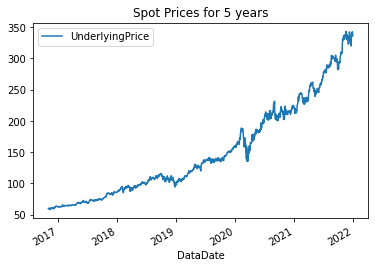

In [142]:
df2.plot()
plt.title('Spot Prices for 5 years')
plt.show()

In [143]:
dfCall = df.loc[df['Type'] == "call"]

In [144]:
dfCall = dfCall[dfCall['DataDate'] == "11/01/2016"]

In [145]:
dfCall['Days'] = (dfCall['Expiration'] - dfCall['DataDate']).astype('timedelta64[D]').astype(int)

In [164]:
grouped = dfCall.groupby('Days')

In [166]:
dfFiltered = grouped.apply(lambda g: g.iloc[(g['Delta'] - 0.5).abs().argsort()[:1]])

In [167]:
dfFiltered

,,index,UnderlyingPrice,Type,Expiration,DataDate,Strike,Last,Bid,Ask,Volume,OpenInterest,IV,Delta,Gamma,Theta,Vega,Days
Days,,,,,,,,,,,,,,,,,,
3,42,42,59.8,call,2016-11-04,2016-11-01,60.0,0.37,0.31,0.37,8134,4904,0.2256,0.4314,0.3644,-33.3893,1.8792,3
10,124,124,59.8,call,2016-11-11,2016-11-01,60.0,0.81,0.76,0.84,878,1959,0.2329,0.4742,0.1788,-17.5871,3.8069,10
17,224,224,59.8,call,2016-11-18,2016-11-01,59.5,0.95,1.12,1.16,453,339,0.2137,0.5265,0.1467,-9.9672,5.0176,17
24,308,308,59.8,call,2016-11-25,2016-11-01,59.5,1.53,1.17,1.23,0,616,0.1932,0.5185,0.1358,-7.2651,5.9981,24
31,380,380,59.8,call,2016-12-02,2016-11-01,59.5,1.15,1.28,1.35,4,39,0.1880,0.5154,0.1224,-6.2155,6.8375,31
38,440,440,59.8,call,2016-12-09,2016-11-01,59.5,1.67,1.39,1.47,0,1,0.1912,0.5046,0.1084,-5.3939,7.5780,38
45,504,504,59.8,call,2016-12-16,2016-11-01,60.0,1.29,1.28,1.32,644,34083,0.1801,0.4669,0.1055,-5.2985,8.2511,45
80,580,580,59.8,call,2017-01-20,2016-11-01,60.0,1.84,1.82,1.86,985,88111,0.1805,0.4879,0.0789,-4.2709,11.0713,80
108,606,606,59.8,call,2017-02-17,2016-11-01,60.0,2.48,2.44,2.52,22,2113,0.2147,0.4849,0.0568,-4.0104,12.8138,108


In [163]:
dfFiltered.index

MultiIndex([(  3,  42),
            ( 10, 124),
            ( 17, 224),
            ( 24, 308),
            ( 31, 380),
            ( 38, 440),
            ( 45, 504),
            ( 80, 580),
            (108, 606),
            (171, 638),
            (227, 676),
            (262, 704),
            (444, 746),
            (808, 782)],
           names=['Days', None])

In [171]:
dfFiltered2 = dfFiltered.filter(['Delta', 'Gamma', 'Theta', 'Vega', 'Days'])

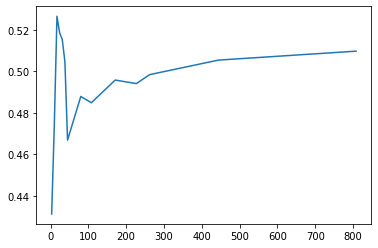

In [174]:
plt.plot(dfFiltered2['Days'], dfFiltered2['Delta'])
plt.show()

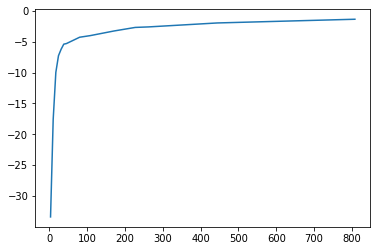

In [178]:
plt.plot(dfFiltered2['Days'], dfFiltered2['Theta'])
plt.show()

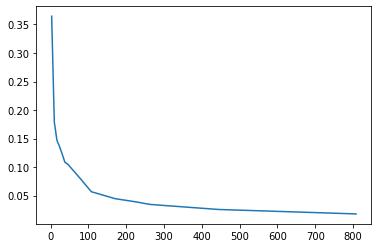

In [179]:
plt.plot(dfFiltered2['Days'], dfFiltered2['Gamma'])
plt.show()

In [102]:
dfFiltered2

,,Delta,Gamma,Theta,Vega
Days,,,,,
3,42,0.4314,0.3644,-33.3893,1.8792
10,124,0.4742,0.1788,-17.5871,3.8069
17,224,0.5265,0.1467,-9.9672,5.0176
24,308,0.5185,0.1358,-7.2651,5.9981
31,380,0.5154,0.1224,-6.2155,6.8375
38,440,0.5046,0.1084,-5.3939,7.5780
45,504,0.4669,0.1055,-5.2985,8.2511
80,580,0.4879,0.0789,-4.2709,11.0713
108,606,0.4849,0.0568,-4.0104,12.8138
